# Michael Xie (Yuting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1

In [2]:
test = pd.read_csv("../data/processed/Data.csv")
test.describe()

,Unnamed: 1,Bank rate,Chartered bank administered interest rates - Prime rate 1,Chartered bank - consumer loan rate 1,"Overnight money market financing, 7 day average 5",Selected Government of Canada benchmark bond yields: 2 year,Selected Government of Canada benchmark bond yields: 3 year,Selected Government of Canada benchmark bond yields: 5 year,Selected Government of Canada benchmark bond yields: 7 year,Selected Government of Canada benchmark bond yields: 10 year,...,Chartered bank - non-chequable savings deposit 1,Chartered bank - Guaranteed Investment Certificates: 1 year 1,Chartered bank - Guaranteed Investment Certificates: 3 year 1,Chartered bank - Guaranteed Investment Certificates: 5 year 1,Treasury Bills: 1 month,Treasury Bills: 2 month,Treasury Bills: 3 month,Treasury Bills: 6 month,Treasury Bills: 1 year,"Real return bonds, long-term"
count,0.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,NaN,1.293590,3.243590,8.781949,1.025987,1.160718,1.201795,1.307590,1.372410,1.492615,...,0.035436,0.839436,1.172923,1.535487,0.922154,0.933692,0.953744,1.023897,1.118359,0.317538
std,NaN,0.677337,0.677813,0.780898,0.694308,0.749870,0.730529,0.673891,0.659765,0.616851,...,0.019297,0.429752,0.462761,0.485783,0.683070,0.692403,0.696096,0.724365,0.760438,0.315422
min,NaN,0.500000,2.450000,7.700000,0.145900,0.160000,0.190000,0.320000,0.350000,0.480000,...,0.010000,0.250000,0.500000,0.800000,0.040000,0.040000,0.050000,0.090000,0.120000,-0.300000
25%,NaN,0.500000,2.450000,8.030000,0.226400,0.300000,0.480000,0.755000,0.860000,1.025000,...,0.010000,0.350000,0.600000,1.000000,0.160000,0.150000,0.155000,0.180000,0.235000,0.110000
50%,NaN,1.500000,3.450000,9.000000,1.245700,1.490000,1.440000,1.400000,1.410000,1.500000,...,0.050000,0.730000,1.330000,1.600000,1.120000,1.150000,1.200000,1.370000,1.620000,0.340000
75%,NaN,2.000000,3.950000,9.130000,1.746750,1.810000,1.880000,1.930000,1.965000,2.055000,...,0.050000,1.300000,1.500000,2.000000,1.630000,1.640000,1.650000,1.690000,1.720000,0.595000
max,NaN,2.000000,3.950000,10.000000,1.754300,2.350000,2.360000,2.440000,2.470000,2.550000,...,0.050000,1.450000,1.800000,2.200000,1.750000,1.700000,1.730000,1.930000,2.150000,0.840000


In [3]:
pandas_profiling.ProfileReport(test)

NameError: name 'pandas_profiling' is not defined

- Observation 1: Place with a large amount of .. means NaN, I will remove the column with ..
- Observation 2: Some column such as Chartered bank - non-chequable savings deposit 1 have almost the same interest rate, so I consider them as fixed interest rate controlled by Central bank. So I will not include them in the analyzation.
- Observation 3: All the columns have high correlation, so they are all moving towards the same direction. I consider them all affected by COVID-19 situation.

## Research question/interests
We are going to find out the impact on Canadian economy by COVID-19 and compare it to the normal economy with the help of bonds rates. Specifically, I want to pick the best period of bonds with high real returns.

In [4]:
df = p1.load_and_process("../data/processed/Data.csv")
dfc = p1.clean_and_rename(df)
dfc

,Date,S2Y,S3Y,S5Y,S7Y,S10Y,M2Y,M4Y,M7Y,M10Y,T1M,T2M,T3M,T6M,T1Y,Real Return
0,3-Jan-18,1.68,1.72,1.86,1.95,2.05,1.66,1.81,1.98,2.24,0.95,1.01,1.06,1.21,1.52,0.58
1,10-Jan-18,1.73,1.79,1.95,2.04,2.16,1.71,1.88,2.07,2.33,0.94,1.04,1.17,1.38,1.62,0.63
2,17-Jan-18,1.78,1.83,2.0,2.1,2.2,1.73,1.94,2.12,2.31,1.0,1.13,1.18,1.35,1.6,0.59
3,24-Jan-18,1.81,1.87,2.05,2.15,2.26,1.77,1.98,2.18,2.35,1.11,1.13,1.21,1.36,1.62,0.6
4,31-Jan-18,1.84,1.96,2.08,2.19,2.29,1.79,2.01,2.21,2.35,1.12,1.15,1.2,1.34,1.61,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,25-Aug-21,0.45,0.57,0.87,1.04,1.25,0.42,0.78,1.15,1.73,0.19,0.21,0.18,0.17,0.27,0.15
191,1-Sep-21,0.41,0.51,0.79,0.96,1.18,0.37,0.71,1.08,1.65,0.19,0.15,0.12,0.18,0.25,0.06
192,8-Sep-21,0.39,0.49,0.8,0.98,1.2,0.38,0.74,1.13,1.69,0.19,0.14,0.15,0.17,0.27,0.04
193,15-Sep-21,0.42,0.52,0.83,1.0,1.22,0.41,0.77,1.15,1.69,0.19,0.13,0.15,0.18,0.28,0.03


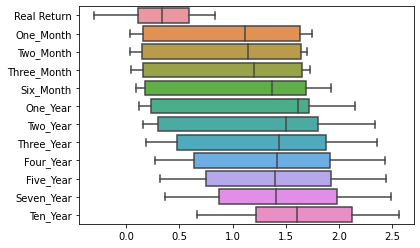

In [7]:
New = p1.new_dataframe(dfc)
sns.boxplot(data=New, orient = "h")
New.to_csv("../data/processed/time_table.csv")

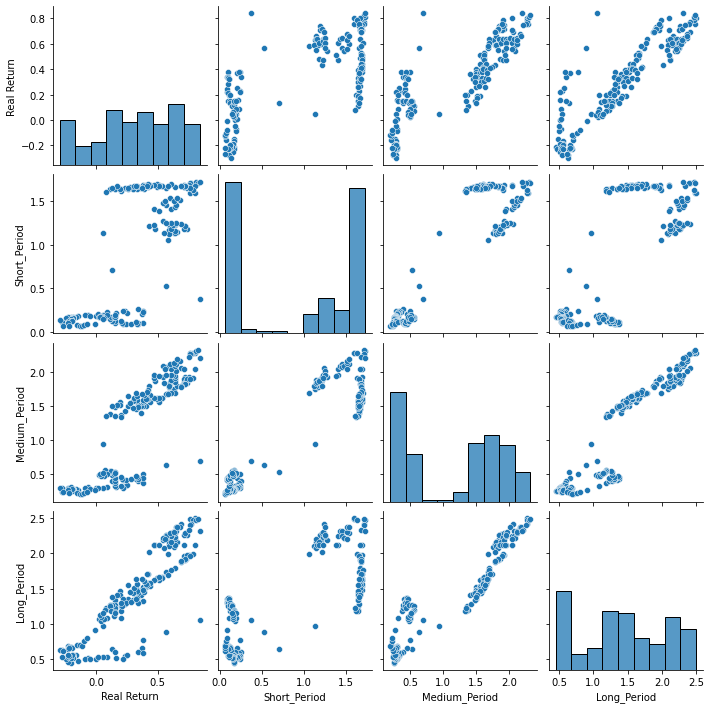

In [8]:
G = p1.group_(New)
R = G.drop(G.columns[[1]], axis=1)
sns.pairplot(R)
G.to_csv("../data/processed/grouped_table.csv")

# Answer to the Research question
### The existence of COVID-19 has huge impact on people's confidence in investment as there is a trend steeply sloping down in the return rates in most bonds. Also, we can see the impact of COVID-19 to Canadian business countinue till now as there is no sign of turning up in bonds rates. The low standard deviation proves the how stable the terrible situation is.